In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from matplotlib.patches import Polygon 
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../../../1_Simulation_Results/numpy_files/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

# Ring & FlatTop & Bessel

In [3]:
LIQ_FF     = np.load(path+'/FlatTop/Fitting/LIQ.npy')
LIQ_FT     = np.load(path+'/FlatTop/TDB/LIQ.npy')

vel_FF     = np.load(path+'/FlatTop/Fitting/vel.npy')
vel_FT     = np.load(path+'/FlatTop/TDB/vel.npy')

temp_FF    = np.load(path+'/FlatTop/Fitting/temp.npy')
temp_FT    = np.load(path+'/FlatTop/TDB/temp.npy')

timeS_FF  = np.load(path+'/FlatTop/Fitting/time.npy')
timeS_FT  = np.load(path+'/FlatTop/TDB/time.npy')

time_steps_FT, time_steps_FF =  timeS_FT.shape[0], timeS_FF.shape[0]

In [4]:
LIQ_RF     = np.load(path+'/Ring/Fitting/LIQ.npy')
LIQ_RT     = np.load(path+'/Ring/TDB/LIQ.npy')

vel_RF     = np.load(path+'/Ring/Fitting/vel.npy')
vel_RT     = np.load(path+'/Ring/TDB/vel.npy')

temp_RF    = np.load(path+'/Ring/Fitting/temp.npy')
temp_RT    = np.load(path+'/Ring/TDB/temp.npy')

timeS_RF  = np.load(path+'/Ring/Fitting/time.npy')
timeS_RT  = np.load(path+'/Ring/TDB/time.npy')

time_steps_RT, time_steps_RF =  timeS_RT.shape[0], timeS_RF.shape[0]

In [5]:
LIQ_BF     = np.load(path+'/Bessel/Fitting/LIQ.npy')
LIQ_BT     = np.load(path+'/Bessel/TDB/LIQ.npy')

vel_BF     = np.load(path+'/Bessel/Fitting/vel.npy')
vel_BT     = np.load(path+'/Bessel/TDB/vel.npy')

temp_BF    = np.load(path+'/Bessel/Fitting/temp.npy')
temp_BT    = np.load(path+'/Bessel/TDB/temp.npy')

timeS_BF  = np.load(path+'/Bessel/Fitting/time.npy')
timeS_BT  = np.load(path+'/Bessel/TDB/time.npy')

time_steps_BT, time_steps_BF =  timeS_BT.shape[0], timeS_BF.shape[0]

# Temperature

### Flat Top

In [ ]:
t_step =  233 # 272
TDatabase = 1
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure

TT_max = temp_FT[:,:,233].max()
TF_max = temp_FF[:,:,272].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
if TDatabase == 0 :
    laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

    hmap1 = ax1.imshow(temp_FF[:,:,t_step], cmap='rainbow', vmin=300, aspect=0.5,  interpolation='quadric')
    
    ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    txt3 = Text(x=0.72, y=0.72, text='t=    s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
    txt4 = Text(x=0.77, y=0.72, text=f'{timeS_FF[t_step]:.1f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
    fig.add_artist(txt3)
    fig.add_artist(txt4)
    ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
    ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    contour_level_LIQ = [0.8]
    contour_LIQ = ax1.contour(LIQ_FF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)
    
    contour_levels = [400, 800,  1337]
    label_colors = ['lime', 'red', 'k']
    contour = ax1.contour(temp_FF[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
      
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
    text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
    fig.add_artist(text)
    cbar.set_ticks([np.max(temp_FF[:,:,t_step])*0.15, (np.max(temp_FF[:,:,t_step])+300)/2, np.max(temp_FF[:,:,t_step])*0.96], labels=[f'{np.min(temp_FF[:,:,t_step]):.0f}', f'{(np.max(temp_FF[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FF[:,:,t_step])*1.0:.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/Temperature_FF_{timeS_FF[t_step]:.0f}s.png',bbox_inches='tight', dpi=800)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/jpg/Temperature_FF_{timeS_FF[t_step]:.0f}s.jpg',bbox_inches='tight',)
else:
    laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

    hmap1 = ax1.imshow(temp_FT[:,:,t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
    
    ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    txt3 = Text(x=0.72, y=0.72, text='t=    s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
    txt4 = Text(x=0.77, y=0.72, text=f'{timeS_FT[t_step]:.1f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
    fig.add_artist(txt3)
    fig.add_artist(txt4)
    ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
    ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    contour_level_LIQ = [0.8]
    contour_LIQ = ax1.contour(LIQ_FT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)
    
    contour_levels = [400, 800,  1337]
    label_colors = ['lime', 'red', 'k']
    contour = ax1.contour(temp_FT[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
      
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
    text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
    fig.add_artist(text)
    cbar.set_ticks([np.max(temp_FT[:,:,t_step])*0.15, (np.max(temp_FT[:,:,t_step])+300)/2, np.max(temp_FT[:,:,t_step])*0.96], labels=[f'{np.min(temp_FT[:,:,t_step]):.0f}', f'{(np.max(temp_FT[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FT[:,:,t_step])*1.0:.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)
    
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/Temperature_FT_{timeS_FT[t_step]:.0f}s.png',bbox_inches='tight', dpi=800)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/jpg/Temperature_FT_{timeS_FT[t_step]:.0f}s.jpg',bbox_inches='tight',)

plt.show()

In [ ]:
t_step = 272
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

TF_max = temp_FF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_FF[:,lead:end,t_step], cmap='rainbow', vmin=300, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_FF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = plt.contour(temp_FF[:,lead:end, t_step], levels=contour_levels, colors='white', linestyles='dotted', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

# txt1 = Text(x=0.38, y=0.70, text='t=    s', fontsize=35, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.415, y=0.70, text=f'{timeS_FF[t_step]:.1f}', fontsize=35, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

############## Color Bar ###########
ax3 = fig.add_axes([0.07, 0.3, 0.05, 0.39]) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax3, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.085, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(temp_FF[:,:,t_step])*0.15, (np.max(temp_FF[:,:,t_step])+300)/2, np.max(temp_FF[:,:,t_step])*0.96], labels=[f'{np.min(temp_FF[:,:,t_step]):.0f}', f'{(np.max(temp_FF[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FF[:,:,t_step])*1.0:.0f}'], weight='bold') 
cbar.ax.yaxis.set_ticks_position('left')
ax3.spines[:].set_linewidth(4)

#######################################################################################################
#######################################################################################################

t_step = 233
lead, end = 115, 295
laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor + lead-6  # Laser position in accordance with figure

TT_max = temp_FT[:,:,t_step].max()

LIQ_FT_ = np.full(LIQ_FT.shape, np.nan)
LIQ_FT_[:, 221:401, :] = LIQ_FT[:, 115:295, :]
temp_FT_ = np.full(temp_FT.shape, np.nan)
temp_FT_[:, 221:401, :] = temp_FT[:, 115:295, :]

hmap2 = ax1.imshow(temp_FT_[:,:,t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_FT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = ax1.contour(temp_FT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
    
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[230, 220]+[230]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [219]+10*[230, 220]+[230]+[219]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[401, 390]+[401]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(225,0),(400,0)], [(400,200),(225, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

# txt1 = Text(x=0.43, y=0.78, text='t=    s', fontsize=40, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.47, y=0.78, text=f'{timeS_FT[t_step]:.1f}', fontsize=40, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(temp_FT[:,:,t_step])*0.15, (np.max(temp_FT[:,:,t_step])+300)/2, np.max(temp_FT[:,:,t_step])*0.96], labels=[f'{np.min(temp_FT[:,:,t_step]):.0f}', f'{(np.max(temp_FT[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FT[:,:,t_step])*1.0:.0f}'], weight='bold') 

ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-11,411)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# plt.savefig('../../figures/Temp_FFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_FFT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_FFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_FFT.jpg',bbox_inches='tight',)

plt.show()

#### Individual

In [73]:
def front_back(array, condition):
    for fx in range(len(array)-1, 0, -1):
        if array[fx]>=condition:
            break
    for bx in range(len(array)):
        if array[bx]>=condition:
            break
    return fx, bx

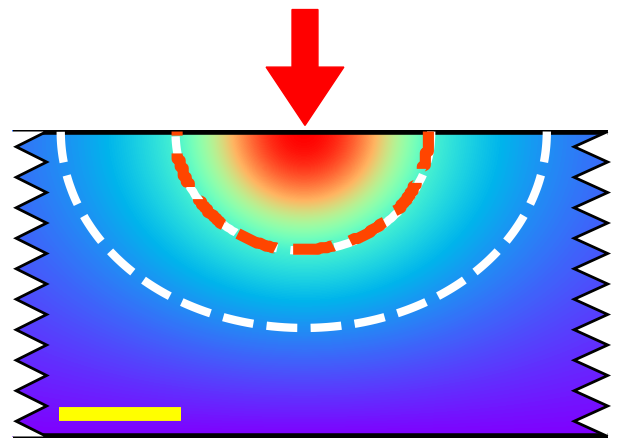

In [180]:
t_step = 272
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

TF_max = temp_FF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_FF[:,lead:end,t_step], cmap='rainbow', vmin=300, aspect=0.5,  interpolation='quadric')
contour_levels = [ 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = plt.contour(temp_FF[:,lead:end, t_step], levels=contour_levels, colors='white', linestyles='dashed', linewidths=6,)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_FF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='--', linewidths=8,)

ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax1.hlines(y=185, xmin=15, xmax=55.1, linewidth=10, color='yellow')

# plt.savefig('../../figures/Temp_FF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_FF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_FF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_FF.jpg',bbox_inches='tight',)


plt.show()

In [106]:
f800, b800 = front_back(temp_FF[0,:,t_step], 800)
f1337, b1337 = front_back(temp_FF[0,:,t_step], 1337)

front_diff = f800-f1337
back_diff = b1337-b800
back_diff/scaling_factor, front_diff/scaling_factor

(94.76309226932668, 94.76309226932668)

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(4,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax1.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_ticks([300], labels=[''])
ax1.spines[:].set_linewidth(0)

# plt.savefig('../../figures/Temp_Fit_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_Fit_colorbar.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_Fit_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_Fit_colorbar.jpg',bbox_inches='tight',)



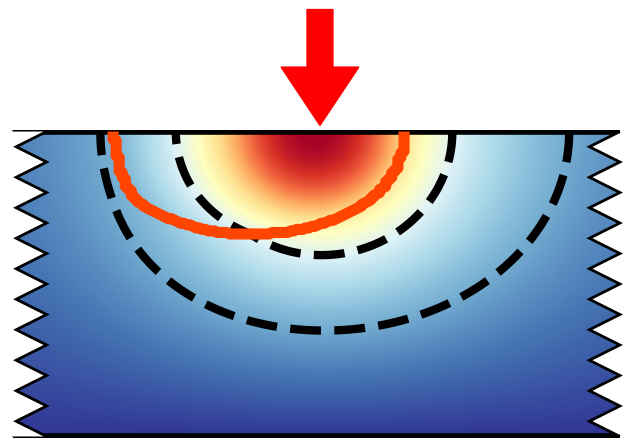

In [179]:
t_step = 233
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 100, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor -lead  # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

LIQ_FT_ = np.full(LIQ_FT.shape, np.nan)
LIQ_FT_[:, 0:200, :] = LIQ_FT[:, lead:end, :]
temp_FT_ = np.full(temp_FT.shape, np.nan)
temp_FT_[:, 0:200, :] = temp_FT[:, lead:end, :]

hmap2 = ax1.imshow(temp_FT_[:,:,t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')


contour_levels = [ 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = ax1.contour(temp_FT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=6, linestyles='dashed')
# [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_FT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=8,)


ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
# ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[199, 189]+[199]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(0,0),(199,0)], [(0,200),(199, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# ax1.hlines(y=185, xmin=145, xmax=185.1, linewidth=10, color='yellow')

# plt.savefig('../../figures/Temp_FT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_FT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_FT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_FT.jpg',bbox_inches='tight',)

plt.show()

In [107]:
f800, b800 = front_back(temp_FT[0,:,t_step], 800)
f1337, b1337 = front_back(temp_FT[0,:,t_step], 1337)

front_diff = f800-f1337
back_diff = b1337-b800
back_diff/scaling_factor, front_diff/scaling_factor

(62.34413965087281, 94.76309226932668)

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(4,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax1.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_ticks([300], labels=[''])
ax1.spines[:].set_linewidth(0)

# plt.savefig('../../figures/Temp_TDB_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_TDB_colorbar.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_TDB_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_TDB_colorbar.jpg',bbox_inches='tight',)



#### Run Above line code before below one

### Ring

In [148]:
TT_max = temp_FT[:,:,233].max()
TF_max = temp_FF[:,:,272].max()

TT_max, TF_max

(2842.8029084595987, 2900.084619680943)

In [ ]:
t_step =  274 # 208
TDatabase = 0
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
if TDatabase == 0 :
    laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

    hmap1 = ax1.imshow(temp_RF[:,:,t_step], cmap='rainbow', vmin=300, vmax=TF_max, aspect=0.5,  interpolation='quadric')
    
    ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    txt3 = Text(x=0.72, y=0.72, text='t=    s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
    txt4 = Text(x=0.77, y=0.72, text=f'{timeS_RF[t_step]:.1f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
    fig.add_artist(txt3)
    fig.add_artist(txt4)
    ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
    ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    contour_level_LIQ = [0.8]
    contour_LIQ = ax1.contour(LIQ_RF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)
    
    contour_levels = [400, 800,  1337]
    label_colors = ['lime', 'red', 'k']
    contour = ax1.contour(temp_RF[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
      
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
    text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
    fig.add_artist(text)
    # cbar.set_ticks([np.max(temp_RF[:,:,t_step])*0.15, (np.max(temp_RF[:,:,t_step])+300)/2, np.max(temp_RF[:,:,t_step])*0.96], labels=[f'{np.min(temp_RF[:,:,t_step]):.0f}', f'{(np.max(temp_RF[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_RF[:,:,t_step])*1.0:.0f}'], weight='bold') 
    cbar.set_ticks([np.max(temp_FF[:,:,272])*0.15, (np.max(temp_FF[:,:,272])+300)/2, np.max(temp_FF[:,:,272])*0.96], labels=[f'{np.min(temp_FF[:,:,272]):.0f}', f'{(np.max(temp_FF[:,:,272])+300)/2 :.0f}', f'{np.max(temp_FF[:,:,272])*1.0:.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/Temperature_RF_{timeS_RF[t_step]:.0f}s.png',bbox_inches='tight', dpi=800)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/jpg/Temperature_RF_{timeS_RF[t_step]:.0f}s.jpg',bbox_inches='tight',)
else:
    laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

    hmap1 = ax1.imshow(temp_RT[:,:,t_step], cmap='RdYlBu_r', vmin=300, vmax=TT_max,  aspect=0.5,  interpolation='quadric')
    
    ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    txt3 = Text(x=0.72, y=0.72, text='t=    s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
    txt4 = Text(x=0.77, y=0.72, text=f'{timeS_RT[t_step]:.1f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
    fig.add_artist(txt3)
    fig.add_artist(txt4)
    ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
    ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    contour_level_LIQ = [0.8]
    contour_LIQ = ax1.contour(LIQ_RT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)
    
    contour_levels = [400, 800,  1337]
    label_colors = ['lime', 'red', 'k']
    contour = ax1.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
      
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
    text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
    fig.add_artist(text)
    # cbar.set_ticks([np.max(temp_RT[:,:,t_step])*0.15, (np.max(temp_RT[:,:,t_step])+300)/2, np.max(temp_RT[:,:,t_step])*0.96], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{(np.max(temp_RT[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_RT[:,:,t_step])*1.0:.0f}'], weight='bold') 
    cbar.set_ticks([np.max(temp_FT[:,:,233])*0.15, (np.max(temp_FT[:,:,233])+300)/2, np.max(temp_FT[:,:,233])*0.96], labels=[f'{np.min(temp_FT[:,:,233]):.0f}', f'{(np.max(temp_FT[:,:,233])+300)/2 :.0f}', f'{np.max(temp_FT[:,:,233])*1.0:.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)
    
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/Temperature_RT_{timeS_RT[t_step]:.0f}s.png',bbox_inches='tight', dpi=800)
    # plt.savefig(f'../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/4_Manuscript_Figures/jpg/Temperature_RT_{timeS_RT[t_step]:.0f}s.jpg',bbox_inches='tight',)

plt.show()

In [ ]:
t_step = 274
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

# TF_max = temp_RF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_RF[:,lead:end,t_step], cmap='rainbow', vmin=300, vmax=TF_max, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = plt.contour(temp_RF[:,lead:end, t_step], levels=contour_levels, colors='white', linestyles='dotted', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

############## Color Bar ###########
ax3 = fig.add_axes([0.07, 0.3, 0.05, 0.39]) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax3, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.085, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
# cbar.set_ticks([np.max(temp_RF[:,:,t_step])*0.15, (np.max(temp_RF[:,:,t_step])+300)/2, np.max(temp_RF[:,:,t_step])*0.96], labels=[f'{np.min(temp_RF[:,:,t_step]):.0f}', f'{(np.max(temp_RF[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_RF[:,:,t_step])*1.0:.0f}'], weight='bold') 
cbar.set_ticks([np.max(temp_FF[:,:,t_step])*0.15, (np.max(temp_FF[:,:,t_step])+300)/2, np.max(temp_FF[:,:,t_step])*0.96], labels=[f'{np.min(temp_FF[:,:,t_step]):.0f}', f'{(np.max(temp_FF[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FF[:,:,t_step])*1.0:.0f}'], weight='bold') 

cbar.ax.yaxis.set_ticks_position('left')
ax3.spines[:].set_linewidth(4)

#######################################################################################################
#######################################################################################################

t_step = 208
lead, end = 115, 295
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor + lead-6  # Laser position in accordance with figure
# TT_max = temp_RF[:,:,t_step].max()
LIQ_RT_ = np.full(LIQ_RT.shape, np.nan)
LIQ_RT_[:, 221:401, :] = LIQ_RT[:, 115:295, :]
temp_RT_ = np.full(temp_RT.shape, np.nan)
temp_RT_[:, 221:401, :] = temp_RT[:, 115:295, :]

hmap2 = ax1.imshow(temp_RT_[:,:,t_step], cmap='RdYlBu_r', vmin=300, vmax=TT_max, aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = ax1.contour(temp_RT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
    
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[230, 220]+[230]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [219]+10*[230, 220]+[230]+[219]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[401, 390]+[401]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(225,0),(400,0)], [(400,200),(225, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
# cbar.set_ticks([np.max(temp_RT[:,:,t_step])*0.15, (np.max(temp_RT[:,:,t_step])+300)/2, np.max(temp_RT[:,:,t_step])*0.96], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{(np.max(temp_RT[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_RT[:,:,t_step])*1.0:.0f}'], weight='bold') 
cbar.set_ticks([np.max(temp_FT[:,:,t_step])*0.15, (np.max(temp_FT[:,:,t_step])+300)/2, np.max(temp_FT[:,:,t_step])*0.96], labels=[f'{np.min(temp_FT[:,:,t_step]):.0f}', f'{(np.max(temp_FT[:,:,t_step])+300)/2 :.0f}', f'{np.max(temp_FT[:,:,t_step])*1.0:.0f}'], weight='bold') 

ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-11,411)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# txt1 = Text(x=0.43, y=0.78, text='t=    s', fontsize=40, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.47, y=0.78, text=f'{timeS_RT[t_step]:.1f}', fontsize=40, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

# plt.savefig('../../figures/Temp_RFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_RFT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_RFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_RFT.jpg',bbox_inches='tight',)

plt.show()

#### Individual

In [150]:
TF_max = temp_FF[:,:,272].max()
TT_max = temp_FT[:,:,233].max()

TF_max, TT_max

(2900.084619680943, 2842.8029084595987)

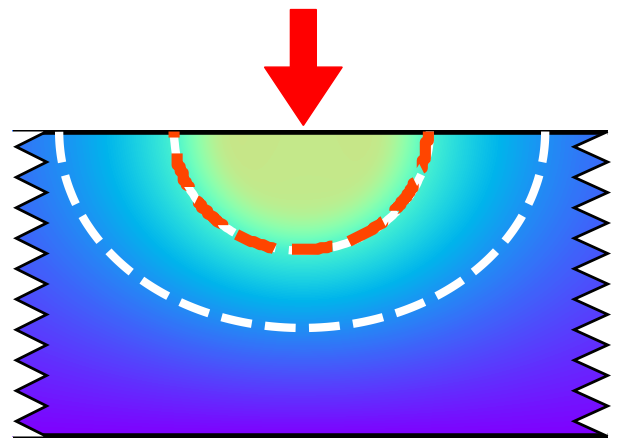

In [182]:
t_step = 274
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_RF[:,lead:end,t_step], cmap='rainbow', vmin=300, vmax=TF_max, aspect=0.5,  interpolation='quadric')

contour_levels = [ 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = plt.contour(temp_RF[:,lead:end, t_step], levels=contour_levels, colors='white', linestyles='dashed', linewidths=6,)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='--', linewidths=8,)

# [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
# ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# ax1.hlines(y=185, xmin=15, xmax=55.1, linewidth=10, color='yellow')

# plt.savefig('../../figures/Temp_RF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_RF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_RF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_RF.jpg',bbox_inches='tight',)

plt.show()

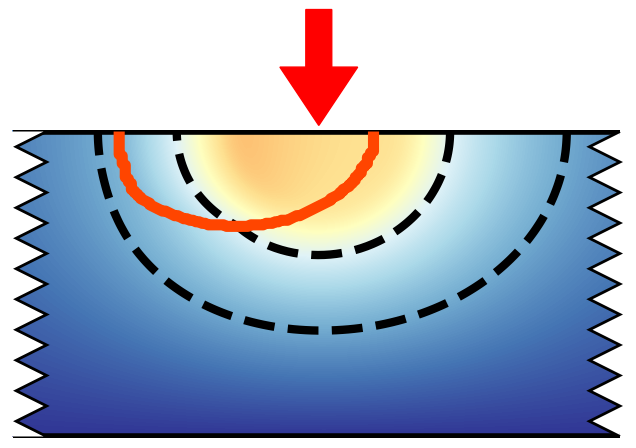

In [184]:
t_step = 208
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 100, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor -lead  # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

LIQ_RT_ = np.full(LIQ_RT.shape, np.nan)
LIQ_RT_[:, 0:200, :] = LIQ_RT[:, lead:end, :]
temp_RT_ = np.full(temp_RT.shape, np.nan)
temp_RT_[:, 0:200, :] = temp_RT[:, lead:end, :]

hmap2 = ax1.imshow(temp_RT_[:,:,t_step], cmap='RdYlBu_r', vmin=300, vmax=TT_max, aspect=0.5,  interpolation='quadric')


contour_levels = [ 800,  1337]
label_colors = ['lime', 'red', 'k']
contour = ax1.contour(temp_RT_[:, :, t_step], levels=contour_levels, colors='k', linewidths=6, linestyles='dashed')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=8,)

# [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]
    
ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
# ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[199, 189]+[199]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(0,0),(199,0)], [(0,200),(199, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# ax1.hlines(y=185, xmin=145, xmax=185.1, linewidth=10, color='yellow')

# plt.savefig('../../figures/Temp_RT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temp_RT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temp_RT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temp_RT.jpg',bbox_inches='tight',)

plt.show()

# Velocity

### Bessel

In [ ]:
t_step = 267
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

VF_max = vel_BF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_BF[:,lead:end,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_BF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_BF[:, lead:end, t_step], levels=contour_levels, colors='lime', linewidths=2, )# linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

# txt1 = Text(x=0.38, y=0.70, text='t=    s', fontsize=35, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.415, y=0.70, text=f'{timeS_BF[t_step]:.1f}', fontsize=35, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

############## Color Bar ###########
ax3 = fig.add_axes([0.07, 0.3, 0.05, 0.39]) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax3, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.125, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_BF[:,:,t_step])*0.06, (np.max(vel_BF[:,:,t_step]))/2, np.max(vel_BF[:,:,t_step])*0.96], labels=[f'{np.min(vel_BF[:,:,t_step]):.0f}', f'{np.max(vel_BF[:,:,t_step])/2 :.0f}', f'{np.max(vel_BF[:,:,t_step]):.0f}'], weight='bold') 
cbar.ax.yaxis.set_ticks_position('left')
ax3.spines[:].set_linewidth(4)

#######################################################################################################
#######################################################################################################

t_step = 243
lead, end = 115, 295
laser_act_pos = 125 + timeS_BT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor + lead-6  # Laser position in accordance with figure

VT_max = vel_BT[:,:,t_step].max()

LIQ_BT_ = np.full(LIQ_BT.shape, np.nan)
LIQ_BT_[:, 221:401, :] = LIQ_BT[:, lead:end, :]
temp_BT_ = np.full(temp_BT.shape, np.nan)
temp_BT_[:, 221:401, :] = temp_BT[:, lead:end, :]
vel_BT_ = np.full(vel_BT.shape, np.nan)
vel_BT_[:, 221:401, :] = vel_BT[:, lead:end, :]

hmap2 = ax1.imshow(vel_BT_[:,:,t_step], cmap='nipy_spectral_r', vmin=2,  aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_BT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=3,)

contour_levels = [400, 800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_BT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=3, linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]


ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[230, 220]+[230]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [219]+10*[230, 220]+[230]+[219]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[401, 390]+[401]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(225,0),(400,0)], [(400,200),(225, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

# txt1 = Text(x=0.43, y=0.78, text='t=    s', fontsize=40, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.47, y=0.78, text=f'{timeS_BT[t_step]:.1f}', fontsize=40, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.895, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_BT[:,:,t_step])*0.06, (np.max(vel_BT[:,:,t_step]))/2, np.max(vel_BT[:,:,t_step])*0.96], labels=[f'{np.min(vel_BT[:,:,t_step]):.0f}', f'{np.max(vel_BT[:,:,t_step])/2 :.0f}', f'{np.max(vel_BT[:,:,t_step]):.0f}'], weight='bold') 
ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-11,411)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# plt.savefig('../../figures/Vel_BFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_BFT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_BFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_BFT.jpg',bbox_inches='tight',)

plt.show()

#### Individual

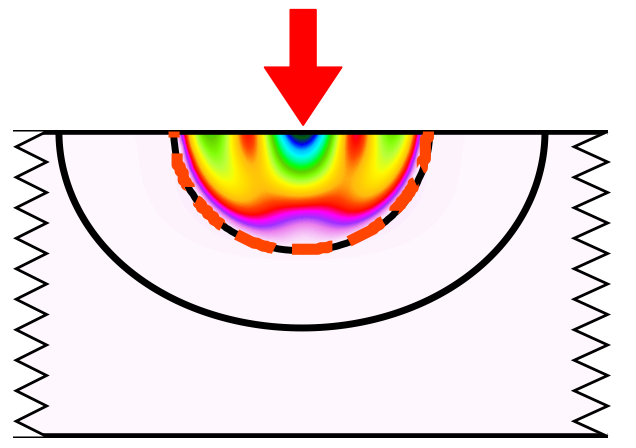

In [194]:
t_step = 267
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

VF_max = vel_BF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_BF[:,lead:end,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='quadric')

contour_levels = [800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_BF[:, lead:end, t_step], levels=contour_levels, colors='k', linewidths=5, )# linestyles='dotted')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_BF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='--', linewidths=8,)

ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# plt.savefig('../../figures/Vel_BF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_BF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_BF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_BF.jpg',bbox_inches='tight',)


plt.show()

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(4,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax1.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_ticks([2], labels=[''])
ax1.spines[:].set_linewidth(0)

# plt.savefig('../../figures/Vel_Fit_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_Fit_colorbar.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_Fit_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_Fit_colorbar.jpg',bbox_inches='tight',)


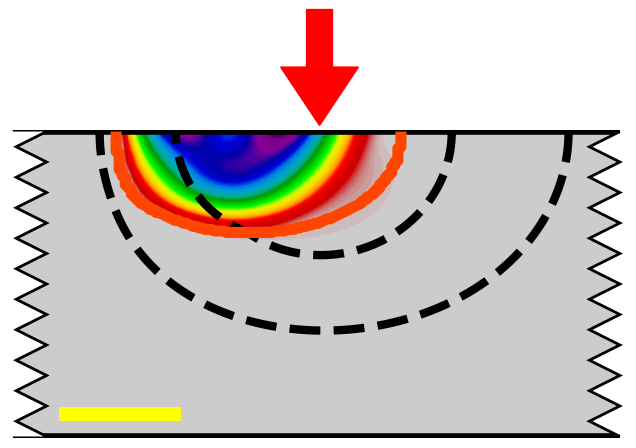

In [211]:

t_step = 243
lead, end = 100, 300
laser_act_pos = 125 + timeS_BT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead  # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

VT_max = vel_BT[:,:,t_step].max()

LIQ_BT_ = np.full(LIQ_BT.shape, np.nan)
LIQ_BT_[:, 0:200, :] = LIQ_BT[:, lead:end, :]
temp_BT_ = np.full(temp_BT.shape, np.nan)
temp_BT_[:, 0:200, :] = temp_BT[:, lead:end, :]
vel_BT_ = np.full(vel_BT.shape, np.nan)
vel_BT_[:, 0:200, :] = vel_BT[:, lead:end, :]

hmap2 = ax1.imshow(vel_BT_[:,:,t_step], cmap='nipy_spectral_r', vmin=2,  aspect=0.5,  interpolation='quadric')


contour_levels = [800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_BT_[:, :, t_step], levels=contour_levels, colors='k', linewidths=6, linestyles='dashed')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_BT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=8,)

ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[199, 189]+[199]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

l1, l2 = [(0,0),(199,0)], [(0,200),(199, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax1.hlines(y=185, xmin=15, xmax=55.1, linewidth=10, color='yellow')

# plt.savefig('../../figures/Vel_BT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_BT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_BT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_BT.jpg',bbox_inches='tight',)

plt.show()

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(4,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax1.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax1, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_ticks([2], labels=[''])
ax1.spines[:].set_linewidth(0)

# plt.savefig('../../figures/Vel_TDB_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_TDB_colorbar.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_TDB_colorbar.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_TDB_colorbar.jpg',bbox_inches='tight',)


#### Run Above line code before below one

### Ring

In [212]:
VT_max = vel_BT[:,:,243].max()
VF_max = vel_BF[:,:,267].max()
VT_max, VF_max

(56.29832070577618, 81.17697493341521)

In [ ]:
t_step = 274
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

# VF_max = vel_RF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_RF[:,lead:end,t_step], cmap='gist_ncar_r', vmin=2, vmax=VF_max, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=4,)

contour_levels = [400, 800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_RF[:, lead:end, t_step], levels=contour_levels, colors='lime', linewidths=2, )# linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]


ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

############## Color Bar ###########
ax3 = fig.add_axes([0.07, 0.3, 0.05, 0.39]) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax3, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.125, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_BF[:,:,t_step])*0.06, (np.max(vel_BF[:,:,t_step]))/2, np.max(vel_BF[:,:,t_step])*0.96], labels=[f'{np.min(vel_BF[:,:,t_step]):.0f}', f'{np.max(vel_BF[:,:,t_step])/2 :.0f}', f'{np.max(vel_BF[:,:,t_step]):.0f}'], weight='bold') 
cbar.ax.yaxis.set_ticks_position('left')
ax3.spines[:].set_linewidth(4)

#######################################################################################################
#######################################################################################################

t_step = 208
lead, end = 115, 295
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor + lead-6  # Laser position in accordance with figure
# VT_max = vel_RT[:,:,t_step].max()
LIQ_RT_ = np.full(LIQ_RT.shape, np.nan)
LIQ_RT_[:, 221:401, :] = LIQ_RT[:, lead:end, :]
temp_RT_ = np.full(temp_RT.shape, np.nan)
temp_RT_[:, 221:401, :] = temp_RT[:, lead:end, :]
vel_RT_ = np.full(vel_RT.shape, np.nan)
vel_RT_[:, 221:401, :] = vel_RT[:, lead:end, :]

hmap2 = ax1.imshow(vel_RT_[:,:,t_step], cmap='nipy_spectral_r', vmin=2, vmax=VT_max, aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=4,)

contour_levels = [400, 800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_RT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=3, linestyles='dotted')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]


ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[230, 220]+[230]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [219]+10*[230, 220]+[230]+[219]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[401, 390]+[401]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

l1, l2 = [(225,0),(400,0)], [(400,200),(225, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=0.895, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_BT[:,:,t_step])*0.06, (np.max(vel_BT[:,:,t_step]))/2, np.max(vel_BT[:,:,t_step])*0.96], labels=[f'{np.min(vel_BT[:,:,t_step]):.0f}', f'{np.max(vel_BT[:,:,t_step])/2 :.0f}', f'{np.max(vel_BT[:,:,t_step]):.0f}'], weight='bold') 
ax2.spines[:].set_linewidth(4)
ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-11,411)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# txt1 = Text(x=0.43, y=0.78, text='t=    s', fontsize=40, color='k', rotation=0, weight='bold', fontname='FreeMono',)
# txt2 = Text(x=0.47, y=0.78, text=f'{timeS_RT[t_step]:.1f}', fontsize=40, color='red', rotation=0, weight='bold', fontname='FreeMono',)
# fig.add_artist(txt1)
# fig.add_artist(txt2)

# plt.savefig('../../figures/Vel_RFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_RFT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_RFT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_RFT.jpg',bbox_inches='tight',)

plt.show()

#### Individual

In [7]:
VT_max = vel_BT[:,:,243].max()
VF_max = vel_BF[:,:,267].max()
VT_max, VF_max

(56.29832070577618, 81.17697493341521)

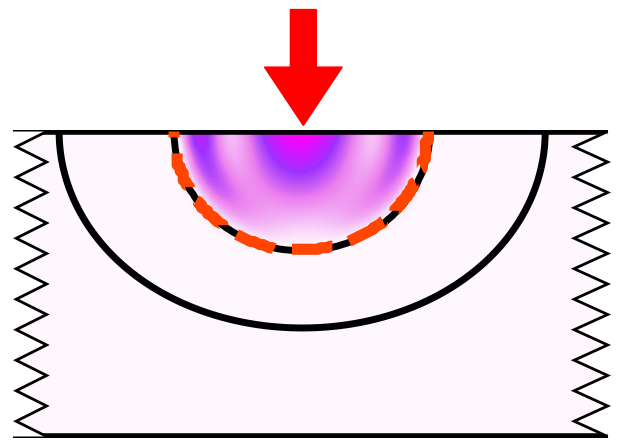

In [8]:
t_step = 274
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

lead, end = 105, 300
laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead # Laser position in accordance with figure

# VF_max = vel_RF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_RF[:,lead:end,t_step], cmap='gist_ncar_r', vmin=2, vmax=VF_max, aspect=0.5,  interpolation='quadric')

contour_levels = [800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_RF[:, lead:end, t_step], levels=contour_levels, colors='k', linewidths=5, )# linestyles='dotted')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RF[:,lead:end, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='--', linewidths=8,)

# [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=22, fmt='%1.0f K'), label_colors)]


ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
# ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

l1,l2 = [(195,200),(0,200)], [(0,0), (195,0)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[195, 184]+[195]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# plt.savefig('../../figures/Vel_RF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_RF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_RF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_RF.jpg',bbox_inches='tight',)

plt.show()

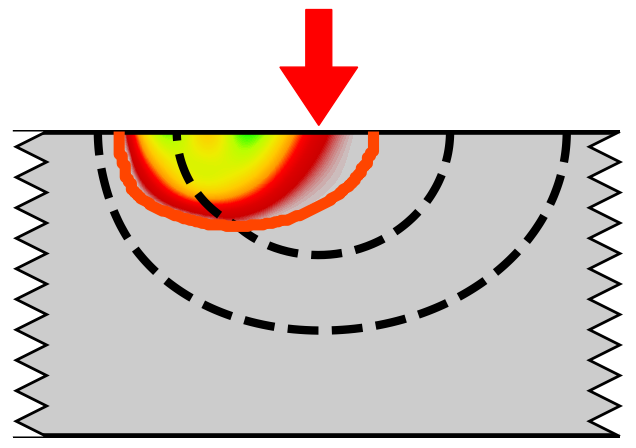

In [13]:
t_step = 208
lead, end = 100, 300
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor - lead  # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(8,4), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

# VT_max = vel_RT[:,:,t_step].max()
LIQ_RT_ = np.full(LIQ_RT.shape, np.nan)
LIQ_RT_[:, 0:200, :] = LIQ_RT[:, lead:end, :]
temp_RT_ = np.full(temp_RT.shape, np.nan)
temp_RT_[:, 0:200, :] = temp_RT[:, lead:end, :]
vel_RT_ = np.full(vel_RT.shape, np.nan)
vel_RT_[:, 0:200, :] = vel_RT[:, lead:end, :]

hmap2 = ax1.imshow(vel_RT_[:,:,t_step], cmap='nipy_spectral_r', vmin=2, vmax=VT_max, aspect=0.5,  interpolation='quadric')

contour_levels = [800,  1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(temp_RT_[:, :, t_step], levels=contour_levels, colors='black', linewidths=6, linestyles='dashed')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_RT_[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=8,)

# [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=21, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
# ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
# ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(1)

x1 = 10*[10, 0]+[10]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [-1]+10*[10, 0]+[10]+[-1]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
x3 = 10*[199, 189]+[199]
y3 = list(np.linspace(0, 200, 21, dtype=int))
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='k', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=2, zorder=10,)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)
ax1.add_patch(polygon3)


l1, l2 = [(0,0),(199,0)], [(0,200),(199, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))

ax1.spines[:].set_linewidth(0)
ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,201)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# plt.savefig('../../figures/Vel_RT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel_RT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel_RT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel_RT.jpg',bbox_inches='tight',)

plt.show()